In [ ]:
# parse the notebook in the parent directory.
%cd ../

In [3]:
from utils.dataloader import DataLoader
from utils.aug import KeypointSafeRandomCrop
import albumentations as A
import matplotlib.pyplot as plt
import cv2
import numpy as np

2023-05-08 11:25:45.418990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 11:25:46.140709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Example Train DataLoader

KeypointSafeRandomCrop is a custom augmentation that inherits DualTransform class of albumentations.

Since RandomCrop occasionally exculudes all keypoints by chance (e.g. random cropping sky of the image),

A custom random crop is implemented so that at least one keypoint will be present after the crop.

In [ ]:
train_aug = A.Compose([
    A.Blur(blur_limit=3, p=0.2),
    A.ColorJitter(p=0.2),
    A.HorizontalFlip(p=0.5),
    A.RandomScale(scale_limit=(-0.3,0.3), always_apply=False, p=0.5),
    A.PadIfNeeded(min_height=128, min_width=128,
                    border_mode=0, p=1.0),
    KeypointSafeRandomCrop(width=128, height=128, always_apply=True),
], keypoint_params=A.KeypointParams(format='xy', label_fields=['class_labels']))

train_dt = DataLoader(
    "shanghaitech_train.json",
    "ShanghaiTech/part_A/train_data/images",
    batch_size=32,augmentations=train_aug)

In [ ]:
for images, y_trues in train_dt:
    plt.figure(figsize=(8,4))
    for i, (image, y_true) in enumerate(zip(images,y_trues)):
        image = image.astype(np.uint8)
        for coord in y_true[...,:2]:
            cv2.circle(image, (int(coord[0]),int(coord[1])), 3, (255,0,0),-1)
        plt.subplot(4,8,i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    break

## Example Val DataLoader

In [5]:
val_aug = A.Compose([
    A.PadIfNeeded(min_height=256, min_width=256,
                    border_mode=0, p=1.0),
    A.CenterCrop(width=256, height=256, always_apply=True),
], keypoint_params=A.KeypointParams(format='xy', label_fields=['class_labels']))

val_dt = DataLoader(
    "shanghaitech_val.json",
    "ShanghaiTech/part_A/train_data/images",
    batch_size=8,augmentations=val_aug)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


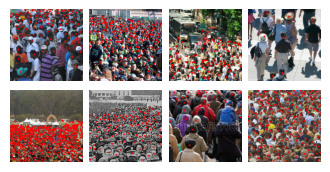

In [11]:
for images, y_trues in val_dt:
    plt.figure(figsize=(4,2))
    for i, (image, y_true) in enumerate(zip(images,y_trues)):
        image = image.astype(np.uint8)
        for coord in y_true[...,:2]:
            cv2.circle(image, (int(coord[0]),int(coord[1])), 3, (255,0,0),-1)
        plt.subplot(2,4,i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    break

## Eample Test DataLoader

In [12]:
test_dt = DataLoader(
    "shanghaitech_test.json",
    "ShanghaiTech/part_A/test_data/images",
    batch_size=1,augmentations=False)

test_dt = DataLoader(
    "shanghaitech_test.json",
    "ShanghaiTech/part_A/test_data/images",
    batch_size=1,augmentations=False)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


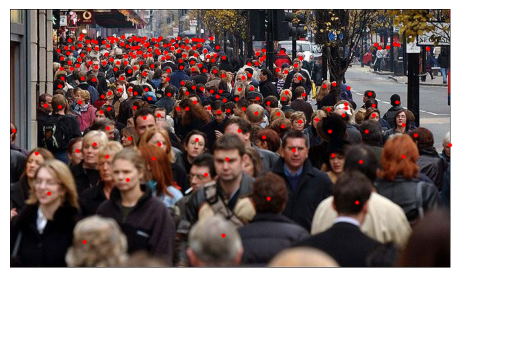

In [14]:
for images, y_trues in test_dt:
    for i, (image, y_true) in enumerate(zip(images,y_trues)):
        image = image.astype(np.uint8)
        for coord in y_true[...,:2]:
            cv2.circle(image, (int(coord[0]),int(coord[1])), 3, (255,0,0),-1)
        plt.imshow(image)
        plt.axis('off')
        break
    break